**Bank Analysis**

Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Data Collection

In [ ]:
df = pd.read_csv("bank_churn.csv")
df.shape

(10000, 14)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# jumlah data unik
print (df['Geography'].unique())
print (df['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Describe ,

Digunakan untuk melihat pemusatan dan penyebaran data



In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Data Analysis**

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Analisis Kategorik

In [ ]:
cat = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited' ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


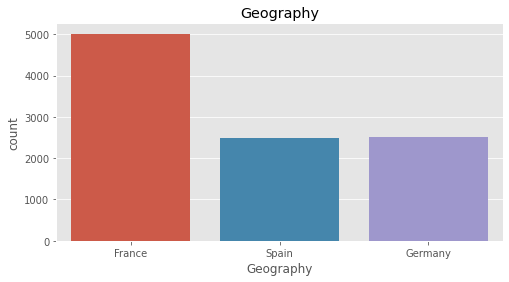

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


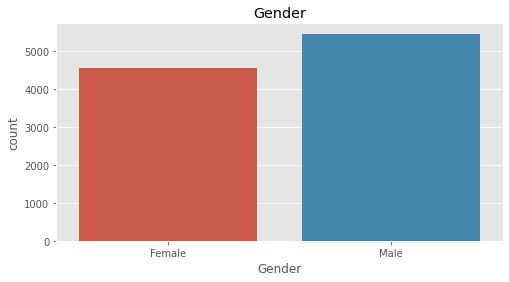

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


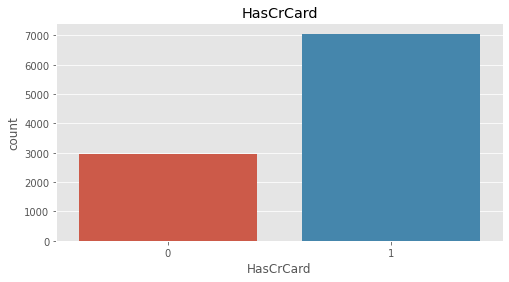

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


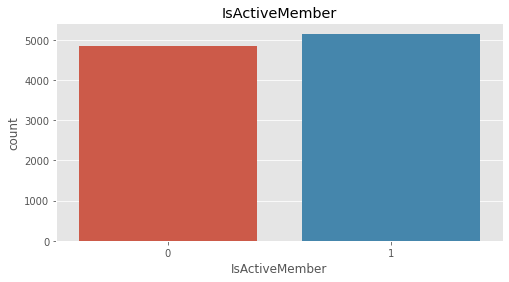

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


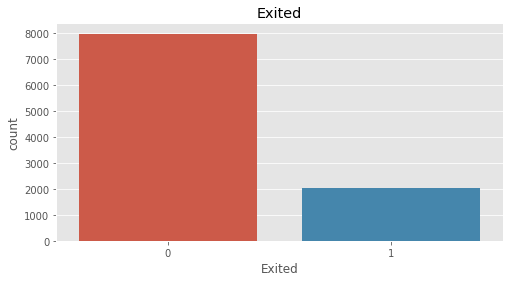

In [ ]:
for column in cat:
  plt.figure(figsize=(8,4))
  plt.title(f"{column}")
  sns.countplot(df[column])
  plt.show()

Buat kesimpulan dari graph yang dibuat


*   50 % customer bank itu berasal dari negara perancis dan sisanya berasal dari spanyol dan jerman
*   Customer laki-laki lebih banyak ketimbang customer perempuan
*   70 % customer memiliki credit cartd
*   80 % customer masih berada di bank, dan sisanya 20 % persen telah meninggalkan bank





Analisis Numerik

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
numeric_col = ['CreditScore','Age', 'Tenure',  'Balance','NumOfProducts','EstimatedSalary' ]


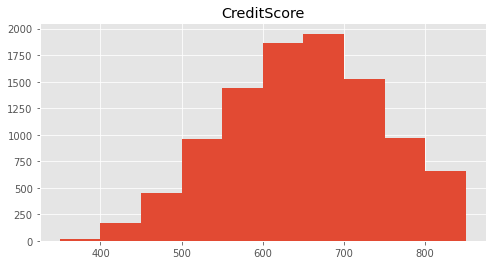

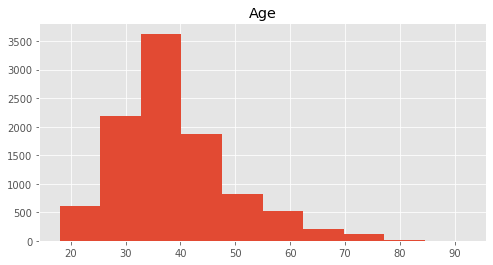

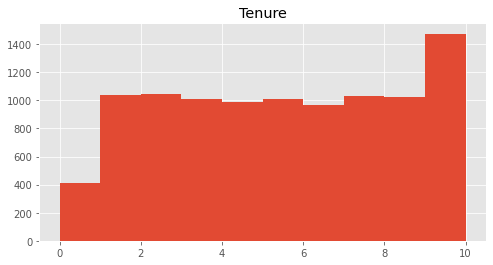

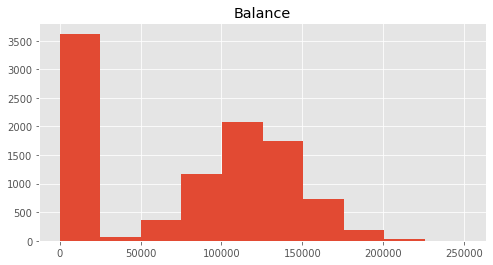

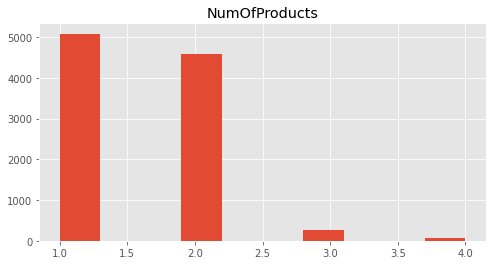

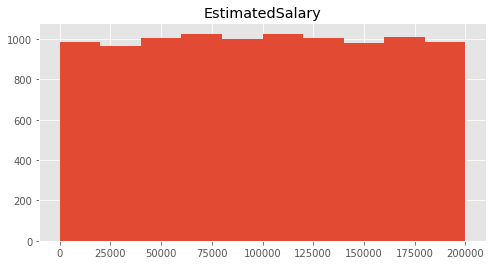

In [ ]:
for column in numeric_col:
  plt.figure(figsize=(8,4))
  plt.title(f"{column}")
  plt.hist(df[column])
  plt.show()

Buat kesimpulan dari grafik ditas
*   Kebanyakan customer memiliki credit score antara 500-800
*   Kebanyakan customer memiliki umur antara 25 -50

*   Jabatan memiliki distribusi seragam
*   Estimated salary memiliki distribusi seragam






Analisis Numerik Vs Kategorik


<Figure size 720x432 with 0 Axes>

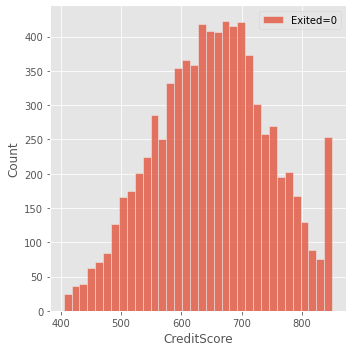

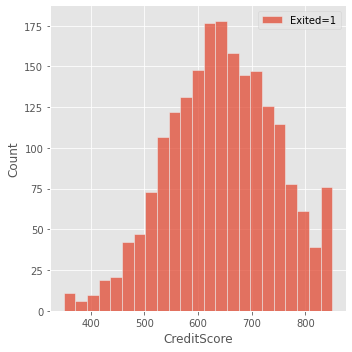

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(df['CreditScore'][df['Exited']==0])
plt.legend(['Exited=0'])
plt.show()
sns.displot(df['CreditScore'][df['Exited']==1])
plt.legend(['Exited=1'])
plt.show()

Kesimpulan : Credit score bukan alasan utama customer pergi(exited) dari bank

<Figure size 720x432 with 0 Axes>

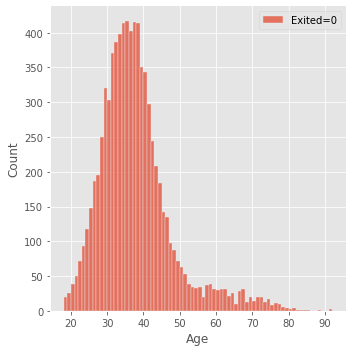

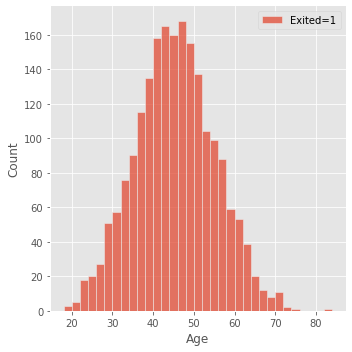

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(df['Age'][df['Exited']==0])
plt.legend(['Exited=0'])
plt.show()
sns.displot(df['Age'][df['Exited']==1])
plt.legend(['Exited=1'])
plt.show()

Kesimpulan: Usia 20 sd 45, rata-rata orang masih menjadi nasabah bank. Sedangkan untuk usia ditas 40-60, mereka cendurung untuk meninggalkan bank

<Figure size 720x432 with 0 Axes>

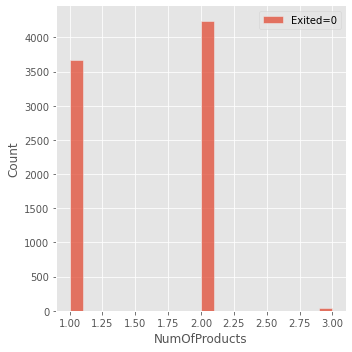

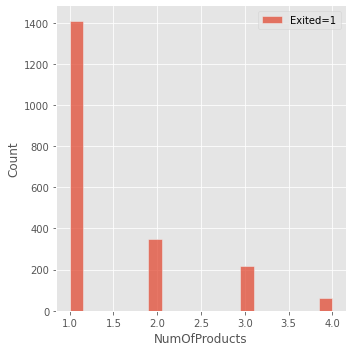

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(df['NumOfProducts'][df['Exited']==0])
plt.legend(['Exited=0'])
plt.show()
sns.displot(df['NumOfProducts'][df['Exited']==1])
plt.legend(['Exited=1'])
plt.show()

Kesimpulan, tidak ada pengaruh balance terhadap orang yang meninggalkan dan tetap dibank

Analisis Kategorik vs Kategorik

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
pivot = pd.crosstab(df['Geography'], df['Exited'], margins=True)
pivot

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


In [ ]:
ratio = pivot[1]/pivot['All']
ratio

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

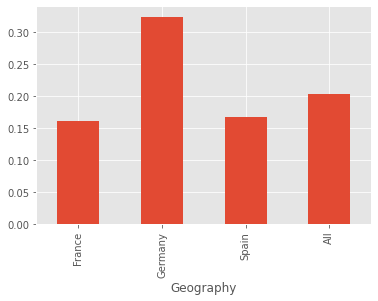

In [ ]:
ratio.plot.bar()

Kesimupan, Jerman merupakan neagra yang lebih banyak meninggalkan bank ketimbang spain dan france

In [ ]:
pivot = pd.crosstab(df['Gender'], df['Exited'], margins=True)
pivot

Exited,0,1,All
Gender,,,
Female,3404,1139,4543
Male,4559,898,5457
All,7963,2037,10000


In [ ]:
ratio = pivot[1]/pivot['All']
ratio

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64

Kesimpulan, customer perumpan lebih banyak meinggalkan bank dibanding customer laki-laki

**Analisis infrensial**

In [ ]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


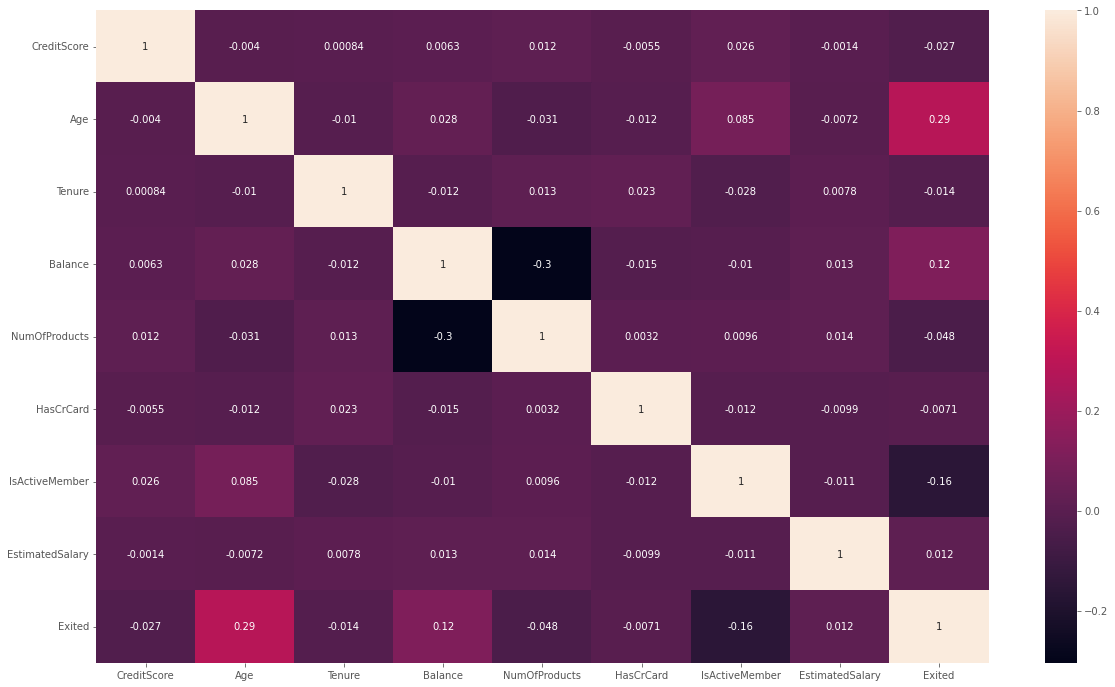

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True)

ANOVA Analysis (Data Numerik)

Ho: Mean Kedua group atau lebih mirip
Ha: Mean Kedua group atau lebih berbeda satu sama lain

Jika p-value < alpha, Tolak Ho
Jika p-value > alpha, Terima Ho

alpa = 0.05

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
numeric_col = ['CreditScore','Age', 'Tenure',  'Balance','NumOfProducts','EstimatedSalary' ]

In [ ]:
xd = df[numeric_col]
yd = df['Exited']

In [ ]:
fvalue, pvalue = f_classif(xd, yd)

In [ ]:
for i in range(len(numeric_col)):
  print(numeric_col[i], pvalue[i])

CreditScore 0.006738213892258643
Age 1.2399313093415039e-186
Tenure 0.1615268494952801
Balance 1.275563319153163e-32
NumOfProducts 1.7173330048040421e-06
EstimatedSalary 0.22644042802376574


Age : 1.2 x 10^-186 < 0.05

NumOfProducts : 1.7 x 10^6 < 0.05